In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from Functions import onefig,figtwo,figthree, createdataset1,createdataset11 
from Functions import create_model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import TimeDistributed

tf.config.list_physical_devices('GPU')
tf.random.set_seed(42)

In [2]:
data_path_e = ".../TIME_SERIES_FORECASTING/input/"
checkpoint_path = ".../TIME_SERIES_FORECASTING/checkpoint_uni5-1"
checkpoint_dir = os.path.dirname(checkpoint_path)
savemod_path = ".../TIME_SERIES_FORECASTING/model-multi/out"     

In [3]:
"""     LOAD and PROCESS AAPL1 DATA                                  """

data_AAPL1 = pd.read_csv(data_path_e +'AAPL1.csv')
data_AAPL1['Date'] = pd.to_datetime(data_AAPL1['Date'],infer_datetime_format=True)

print(f"data_AAPL1[:3] : \n {data_AAPL1[:3]} \n")
print(f"data_AAPL1.shape {data_AAPL1.shape} \n")
print(f"data_AAPL1.info()")
data_AAPL1.info()

data_AAPL1[:3] : 
         Date      Open      High       Low   Close  Adj Close     Volume
0 2010-04-01  8.478929  8.526071  8.312500  8.4275   7.183753  603145200
1 2010-04-05  8.392143  8.518214  8.384643  8.5175   7.260470  684507600
2 2010-04-06  8.507143  8.580000  8.464286  8.5550   7.292434  447017200 

data_AAPL1.shape (3197, 7) 

data_AAPL1.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3197 non-null   datetime64[ns]
 1   Open       3197 non-null   float64       
 2   High       3197 non-null   float64       
 3   Low        3197 non-null   float64       
 4   Close      3197 non-null   float64       
 5   Adj Close  3197 non-null   float64       
 6   Volume     3197 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 175.0 KB


In [4]:
data4feat_AAPL1 = data_AAPL1.drop(axis=1, labels=['Adj Close','Volume'])
col_order = ['Date', 'Open','High','Low','Close']
data4feat_AAPL1 = data4feat_AAPL1.reindex(columns=col_order)
print(f"data4feat_AAPL1[:3]: \n {data4feat_AAPL1[:3]} \n")


data4feat_AAPL1[:3]: 
         Date      Open      High       Low   Close
0 2010-04-01  8.478929  8.526071  8.312500  8.4275
1 2010-04-05  8.392143  8.518214  8.384643  8.5175
2 2010-04-06  8.507143  8.580000  8.464286  8.5550 



In [5]:
data_AAPL1x = data4feat_AAPL1.iloc[:,1:]
data_AAPL1y = data4feat_AAPL1.iloc[:,1:2]

print(f"data_AAPL1x[:3]: \n {data_AAPL1x[:3]} \n")
print(f"data_AAPL1x.shape {data_AAPL1x.shape} \n")
print(f"data_AAPL1y.shape {data_AAPL1y.shape} \n")
data4feat_AAPL1.info()
data_AAPL1x.info()

data_AAPL1x[:3]: 
        Open      High       Low   Close
0  8.478929  8.526071  8.312500  8.4275
1  8.392143  8.518214  8.384643  8.5175
2  8.507143  8.580000  8.464286  8.5550 

data_AAPL1x.shape (3197, 4) 

data_AAPL1y.shape (3197, 1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3197 non-null   datetime64[ns]
 1   Open    3197 non-null   float64       
 2   High    3197 non-null   float64       
 3   Low     3197 non-null   float64       
 4   Close   3197 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 125.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3197 non-null   float64
 1   High    3197 non-null   float64
 2   Low     3197 non-null   f

In [6]:
"""Parameters"""

n_forout = 30 #number  
n_stepsin = 100 # number of steps for train  
n_stepsout = 20 #number of forecasted steps  
nl = 150  # 150
n_features= 4  #1 #1
ndiff = int(nl-n_stepsout)
batch_size = 32 # 1
epochs = 30 # 50  #30 #35 #50 #35  #25   


In [7]:
tf.test.is_gpu_available()


"""              Train Test Split                                           """

train_size = int(len(data_AAPL1x)) #entire size of data AAPL1
tr_size = int(len(data_AAPL1x) * 0.65) # train size of data

#tr_size1 = int(train_size*0.85)  #train and test sizes 
#tr_size1 = int(train_size*0.88)  #train and test sizes 
#tr_size1 = int(train_size*0.80)  #train and test sizes 
tr_size1 = int(train_size*0.95)  #train and test sizes 

data_AAPL12 = data_AAPL1x[0:(tr_size1+n_forout)] #train size + test size + forecast size

print(f"data_AAPL12.shape {data_AAPL12.shape} \n")


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
data_AAPL12.shape (3067, 4) 



train_G1x[:3] : 
        Open      High       Low   Close
0  8.478929  8.526071  8.312500  8.4275
1  8.392143  8.518214  8.384643  8.5175
2  8.507143  8.580000  8.464286  8.5550 

train_G1x.shape (2078, 4) 

train_G1y.shape (2078, 1) 



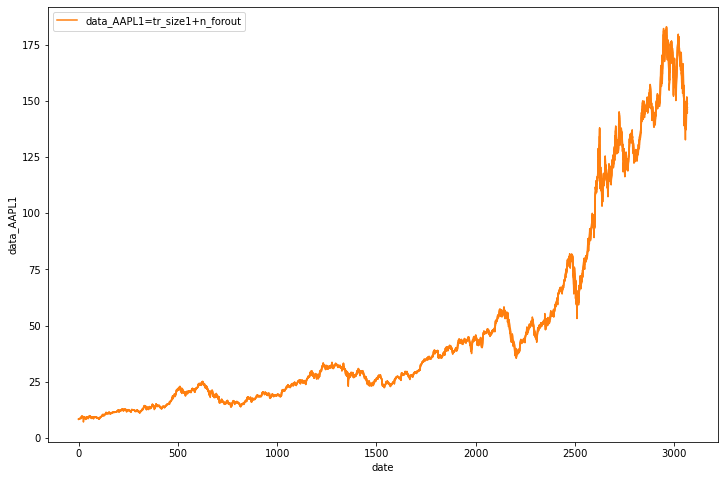

In [8]:
train_G1x = data_AAPL1x[0:tr_size]
train_G1y = data_AAPL1y[0:tr_size]

test_G1x = data_AAPL1x[tr_size:tr_size1]
test_G1y = data_AAPL1y[tr_size:tr_size1]

print(f"train_G1x[:3] : \n {train_G1x[:3]} \n") 
print(f"train_G1x.shape {train_G1x.shape} \n")
print(f"train_G1y.shape {train_G1y.shape} \n")

onefig(12,8,data_AAPL12,'date','data_AAPL1','data_AAPL1=tr_size1+n_forout')

In [9]:
scaler = StandardScaler()
train_Gx = scaler.fit_transform(train_G1x)
train_Gy = scaler.fit_transform(train_G1y)
test_Gx = scaler.fit_transform(test_G1x)
test_Gy = scaler.fit_transform(test_G1y)

print(f"train_Gx.shape {train_Gx.shape} \n")
print(f"test_Gx.shape {test_Gx.shape} \n")

train_Gx.shape (2078, 4) 

test_Gx.shape (959, 4) 



In [10]:
train_gx, train_gy = createdataset1(train_Gx, train_Gy,n_stepsin,n_stepsout)
test_gx, test_gy = createdataset1(test_Gx,test_Gy, n_stepsin,n_stepsout)

print(f"train_gx.shape {train_gx.shape} \n")
print(f"test_gx.shape {test_gx.shape} \n")
print(f"train_gy.shape {train_gy.shape} \n")
print(f"test_gy.shape {test_gy.shape} \n")

train_gx.shape (1958, 100, 4) 

test_gx.shape (839, 100, 4) 

train_gy.shape (1958, 20, 1) 

test_gy.shape (839, 20, 1) 



In [11]:

"""                             Training                                    """


new_model = create_model(nl, n_stepsin, n_features, ndiff, n_stepsout)
new_model.summary 

validation_generator = TimeseriesGenerator(test_gx,test_gy, 
                                           length=n_stepsin, batch_size=batch_size)

cp_callback = ModelCheckpoint(checkpoint_path, 
                                                 #monitor = 'abs(val_loss - loss)',
                                                 #save_model_only=True,
                                                 monitor= 'val_loss',
                                                 min_delta= 1e-3, 
                                                 #monitor = 'val_accuracy',
                                                 verbose=1,
                                                 save_best_only=True,
                                                 #mode = 'max',
                                                 mode='min',
                                                 #restore_best_weights=True,
                                                 #save_best_only=True,
                                                 )

history = new_model.fit(train_gx,train_gy, validation_data=(test_gx,test_gy),
                    epochs=epochs,
                    #callbacks = [cp_callback],
                    #callbacks = [erl_callback],
                    callbacks = [cp_callback],
                    verbose=1
                    ).history


Epoch 1/30
62/62 [==============================] - ETA: 0s - loss: 0.1774
Epoch 1: val_loss improved from inf to 0.03381, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 19s 269ms/step - loss: 0.1774 - val_loss: 0.0338
Epoch 2/30
62/62 [==============================] - ETA: 0s - loss: 0.0236
Epoch 2: val_loss improved from 0.03381 to 0.02659, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 268ms/step - loss: 0.0236 - val_loss: 0.0266
Epoch 3/30
62/62 [==============================] - ETA: 0s - loss: 0.0203
Epoch 3: val_loss did not improve from 0.02659
62/62 [==============================] - 15s 244ms/step - loss: 0.0203 - val_loss: 0.0271
Epoch 4/30
62/62 [==============================] - ETA: 0s - loss: 0.0199
Epoch 4: val_loss did not improve from 0.02659
62/62 [==============================] - 16s 252ms/step - loss: 0.0199 - val_loss: 0.0272
Epoch 5/30
62/62 [==============================] - ETA: 0s - loss: 0.0191
Epoch 5: val_loss improved from 0.02659 to 0.02537, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 273ms/step - loss: 0.0191 - val_loss: 0.0254
Epoch 6/30
62/62 [==============================] - ETA: 0s - loss: 0.0185
Epoch 6: val_loss improved from 0.02537 to 0.02508, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 269ms/step - loss: 0.0185 - val_loss: 0.0251
Epoch 7/30
62/62 [==============================] - ETA: 0s - loss: 0.0182
Epoch 7: val_loss improved from 0.02508 to 0.02442, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 268ms/step - loss: 0.0182 - val_loss: 0.0244
Epoch 8/30
62/62 [==============================] - ETA: 0s - loss: 0.0175
Epoch 8: val_loss did not improve from 0.02442
62/62 [==============================] - 15s 244ms/step - loss: 0.0175 - val_loss: 0.0260
Epoch 9/30
62/62 [==============================] - ETA: 0s - loss: 0.0180
Epoch 9: val_loss did not improve from 0.02442
62/62 [==============================] - 15s 246ms/step - loss: 0.0180 - val_loss: 0.0262
Epoch 10/30
62/62 [==============================] - ETA: 0s - loss: 0.0176
Epoch 10: val_loss improved from 0.02442 to 0.02346, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 268ms/step - loss: 0.0176 - val_loss: 0.0235
Epoch 11/30
62/62 [==============================] - ETA: 0s - loss: 0.0169
Epoch 11: val_loss did not improve from 0.02346
62/62 [==============================] - 15s 248ms/step - loss: 0.0169 - val_loss: 0.0236
Epoch 12/30
62/62 [==============================] - ETA: 0s - loss: 0.0175
Epoch 12: val_loss did not improve from 0.02346
62/62 [==============================] - 15s 250ms/step - loss: 0.0175 - val_loss: 0.0256
Epoch 13/30
62/62 [==============================] - ETA: 0s - loss: 0.0175
Epoch 13: val_loss improved from 0.02346 to 0.02270, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 274ms/step - loss: 0.0175 - val_loss: 0.0227
Epoch 14/30
62/62 [==============================] - ETA: 0s - loss: 0.0169
Epoch 14: val_loss improved from 0.02270 to 0.02248, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 269ms/step - loss: 0.0169 - val_loss: 0.0225
Epoch 15/30
62/62 [==============================] - ETA: 0s - loss: 0.0165
Epoch 15: val_loss did not improve from 0.02248
62/62 [==============================] - 15s 243ms/step - loss: 0.0165 - val_loss: 0.0238
Epoch 16/30
62/62 [==============================] - ETA: 0s - loss: 0.0174
Epoch 16: val_loss improved from 0.02248 to 0.02193, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 266ms/step - loss: 0.0174 - val_loss: 0.0219
Epoch 17/30
62/62 [==============================] - ETA: 0s - loss: 0.0173
Epoch 17: val_loss did not improve from 0.02193
62/62 [==============================] - 15s 245ms/step - loss: 0.0173 - val_loss: 0.0228
Epoch 18/30
62/62 [==============================] - ETA: 0s - loss: 0.0165
Epoch 18: val_loss did not improve from 0.02193
62/62 [==============================] - 15s 245ms/step - loss: 0.0165 - val_loss: 0.0223
Epoch 19/30
62/62 [==============================] - ETA: 0s - loss: 0.0168
Epoch 19: val_loss did not improve from 0.02193
62/62 [==============================] - 16s 251ms/step - loss: 0.0168 - val_loss: 0.0242
Epoch 20/30
62/62 [==============================] - ETA: 0s - loss: 0.0172
Epoch 20: val_loss did not improve from 0.02193
62/62 [==============================] - 15s 244ms/step - loss: 0.0172 - val_loss: 0.0226
Epoch 21/30
62/62 [==============================] - E

INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 276ms/step - loss: 0.0161 - val_loss: 0.0215
Epoch 22/30
62/62 [==============================] - ETA: 0s - loss: 0.0163
Epoch 22: val_loss improved from 0.02154 to 0.02144, saving model to D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1
INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING\checkpoint_uni5-1\assets


62/62 [==============================] - 17s 272ms/step - loss: 0.0163 - val_loss: 0.0214
Epoch 23/30
62/62 [==============================] - ETA: 0s - loss: 0.0160
Epoch 23: val_loss did not improve from 0.02144
62/62 [==============================] - 15s 240ms/step - loss: 0.0160 - val_loss: 0.0248
Epoch 24/30
62/62 [==============================] - ETA: 0s - loss: 0.0160
Epoch 24: val_loss did not improve from 0.02144
62/62 [==============================] - 15s 248ms/step - loss: 0.0160 - val_loss: 0.0230
Epoch 25/30
62/62 [==============================] - ETA: 0s - loss: 0.0175
Epoch 25: val_loss did not improve from 0.02144
62/62 [==============================] - 15s 246ms/step - loss: 0.0175 - val_loss: 0.0220
Epoch 26/30
62/62 [==============================] - ETA: 0s - loss: 0.0156
Epoch 26: val_loss did not improve from 0.02144
62/62 [==============================] - 16s 251ms/step - loss: 0.0156 - val_loss: 0.0220
Epoch 27/30
62/62 [==============================] - E

INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING/model-multi/out95-20-10\assets


INFO:tensorflow:Assets written to: D:/TIME_SERIES_FORECASTING/model-multi/out95-20-10\assets


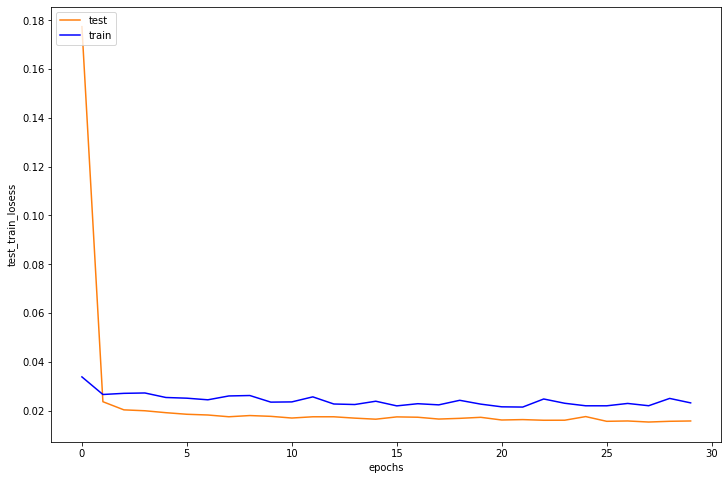

In [12]:
results = {"train_loss": new_model.history.history['loss'],
           "test_loss": new_model.history.history['val_loss'],
           #"best_weights": new_model.history.history['best_weights']
           #"train_accuracy": new_model.history.history['train_accuracy'],
           #"test_accuracy": new_model.history.history['test_accuracy'],
           }

new_model.save(savemod_path + '95-20-10')

trloss = np.array(results["train_loss"])
testloss = np.array(results["test_loss"])


figtwo(12,8,trloss,testloss,'C1','blue', 'epochs','test_train_losess',"test","train")
                  

In [13]:

"""               Prediction                                                """  
                                                                                
new_model = load_model(savemod_path + '95-20-10')                                              

test_predict = new_model.predict(test_gx)
test_predict = scaler.inverse_transform(test_predict)
print(f"test_predict.shape {test_predict.shape} \n")


test_predict.shape (839, 20) 



testfor_G1y.shape (1089, 1) 

test_predict_corr.shape (3167,) 



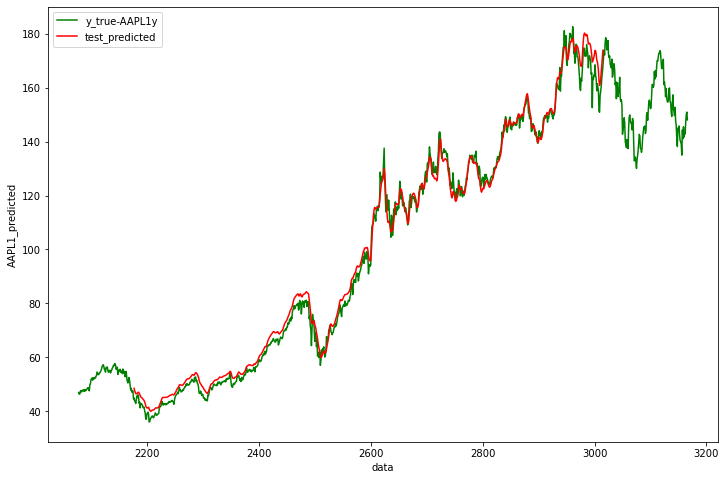

In [14]:
dop =130  #random number

testfor_G1y = data_AAPL1y[tr_size:(tr_size1+dop)] #size of test_predict file plus random number; it must be bigger than test_predict 
print(f"testfor_G1y.shape {testfor_G1y.shape} \n")

test_predict_corr = np.zeros((tr_size1+dop))
test_predict_corr[0:(tr_size1+dop)] = np.nan 
print(f"test_predict_corr.shape {test_predict_corr.shape} \n")

test_predict_corr[(tr_size+n_stepsin-1):(tr_size1-n_stepsout-1)] = test_predict[:,-1]

figtwo(12,8,testfor_G1y,test_predict_corr,'green','red','data','AAPL1_predicted',
       'y_true-AAPL1y','test_predicted')



In [15]:


"""                     FORECASTING                                         """


forstep = 500   #550  #170  # 30  #random number

pl = 100   #random number 
rn= 50 #25  #random number


forin = tr_size1-n_stepsin-forstep   #2053  tr_size1 - 600
forout = forin + int(n_stepsin + forstep + n_stepsout )  #forout = tr_size1 + n_stepsout


testfor_G1a = data_AAPL1x[forin:tr_size1+rn]  #(500,4) # this is a part of test data (test = 600+20) plus new data for forecast=30
testfor_G1ya = data_AAPL1y[forin:tr_size1+rn]
print(f"testfor_G1a.shape {testfor_G1a.shape} \n")  #(120,4)


testfor_G1a.shape (650, 4) 



In [16]:
#n_in = forin+ n_stepsin*4 

#testfor_G1y = data_AAPL1y[forin:forout+rn]
testfor_G1ypl = data_AAPL1y[forin:forout+pl]  #!!!
#testfor_G1ya = data_AAPL1y[forin:tr_size1]
testfor_G1yal = data_AAPL1y[forin:(tr_size1-n_stepsout)]
testfor_G1ya1 = np.zeros((forout,1))
print(f"testfor_G1ypl.shape {testfor_G1ypl.shape} \n")  #(140,4)


testfor_G1ypl.shape (720, 1) 



In [17]:
testfor_G1aa = scaler.fit_transform(testfor_G1a)  #(650,4)
testfor_G1yaa = scaler.fit_transform(testfor_G1ya)  #(650,1)
print(f"testfor_G1aa.shape {testfor_G1aa.shape} \n")  #(600,4)


testfor_G1aa.shape (650, 4) 



In [18]:
n_start = forstep-n_stepsin-n_stepsout
test_pr_gx = testfor_G1aa[(forstep-n_stepsin-n_stepsout):(forstep+n_stepsin+rn),:]
print(f"test_pr_gx.shape {test_pr_gx.shape} \n")


test_pr_gx.shape (270, 4) 



In [19]:

testfor_gx = createdataset11(testfor_G1aa, n_stepsin,n_stepsout)  #()
print(f"testfor_G1aa.shape {testfor_G1aa.shape} \n")  #(600,4)
print(f"testfor_gx.shape {testfor_gx.shape} \n")

testfor_G1aa.shape (650, 4) 

testfor_gx.shape (550, 100, 4) 



In [20]:
testfor_predict2 = new_model.predict(np.array(testfor_gx))
print(f"testfor_predict2.shape {testfor_predict2.shape} \n")


testfor_predict2.shape (550, 20) 



In [21]:
testfor_predict = scaler.inverse_transform(np.array(testfor_predict2))
print(f"testfor_predict.shape {testfor_predict.shape} \n")  #(500,20)


testfor_predict.shape (550, 20) 



testfor_predict_corr.shape (3086,) 

testfor_predict_c.shape (670,) 



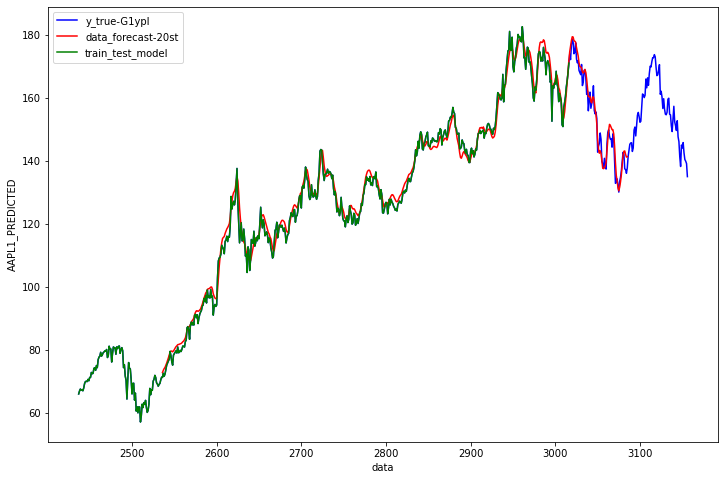

In [22]:
testfor_predict_corr = np.zeros(((forout-1-n_stepsout+rn),))
print(f"testfor_predict_corr.shape {testfor_predict_corr.shape} \n")
testfor_predict_corr[0:(forout-1-n_stepsout+rn),] = np.nan
testfor_predict_corr[(tr_size1-1-forstep):,] = testfor_predict[:,-1]

testfor_predict_c = testfor_predict_corr[(tr_size1-1-n_stepsout-n_stepsin-forstep):,]
print(f"testfor_predict_c.shape {testfor_predict_c.shape} \n")  #()

figthree(12,8,testfor_G1ypl,testfor_predict_corr,testfor_G1yal,'blue','red','green',
         'data','AAPL1_PREDICTED','y_true-G1ypl','data_forecast-20st','train_test_model')
